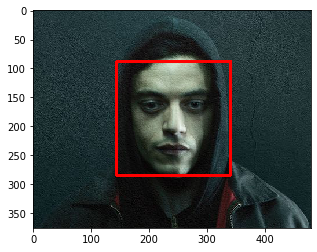

In [14]:
import cv2 as cv
import numpy as np
from PIL import Image
import requests as req
import matplotlib.pyplot as plt
import io

class Face_detector():
    def __init__(self, url):
        self.url = url
        self.image = None
    
    def image_processor(self):
        image = Image.open(io.BytesIO(req.get(self.url, stream=True).content)).convert("RGB")
        self.image = np.array(image)
    
    def cascade_classifier(self):
        self.image_processor()
        detector = cv.CascadeClassifier("./haarcascades.xml")
        faces = detector.detectMultiScale(self.image, 1.3, 2)
        return faces
    
    def detect_face(self):
        for face in self.cascade_classifier():
            x_axis, y_axis, face_height, face_width = face
            cv.rectangle(self.image, (x_axis, y_axis), (x_axis + face_width ,y_axis + face_height), (255,0,0), 3)
            plt.imshow(self.image)
    
    
        
random_face = Face_detector("https://hips.hearstapps.com/digitalspyuk.cdnds.net/16/27/1467993402-mr-robot-edited.jpg?resize=480:*")
random_face.detect_face()